## Goal: to check that the graph and proximity adj. covered all lanes inside the segment

In [11]:
import sys
sys.path.insert(0, '../scripts')
from map_traffic_lights_data import match_point_2_map_segment, SEGMENTS_OUTPUT_PATH, lane_id_2_idx, get_lane_center_line
import os
import pickle
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
with open(os.path.join(SEGMENTS_OUTPUT_PATH, 'map_segment_2_lanes.pkl'), 'rb') as f:
    map_segment_2_lanes = pickle.load(f)

with open(os.path.join(SEGMENTS_OUTPUT_PATH, 'interval_2_segments_x.pkl'), 'rb') as f:
    interval_2_map_segments_x = pickle.load(f)
with open(os.path.join(SEGMENTS_OUTPUT_PATH, 'interval_2_segments_y.pkl'), 'rb') as f:
    interval_2_map_segments_y = pickle.load(f)
with open(os.path.join(SEGMENTS_OUTPUT_PATH, 'segment_x_coords_only.pkl'), 'rb') as f:
    map_segment_x_coords_only = pickle.load(f)
with open(os.path.join(SEGMENTS_OUTPUT_PATH, 'segment_y_coords_only.pkl'), 'rb') as f:
    map_segment_y_coords_only = pickle.load(f)

In [8]:
len(map_segment_2_lanes)

13

In [5]:
lanes_matched = set()
lanes_unmatched = set()
lanes_outside_segments = set()
for lane_id in lane_id_2_idx.keys():
    lane_center_line = get_lane_center_line(lane_id)
    for coord in lane_center_line:
        map_segment_indices = match_point_2_map_segment(*coord, map_segment_x_coords_only, map_segment_y_coords_only,
                                                        interval_2_map_segments_x, interval_2_map_segments_y)
        if len(map_segment_indices) == 0:
            lanes_outside_segments.add(lane_id)
        for map_segment_idx in map_segment_indices:
#             assert lane_id in map_segment_2_lanes[map_segment_idx], f'Lane {lane_id}'
            if lane_id in map_segment_2_lanes[map_segment_idx]:
                lanes_matched.add(lane_id)
            else:
                lanes_unmatched.add(lane_id)

In [6]:
len(lanes_matched), len(lanes_unmatched), len(lanes_outside_segments)

(4602, 0, 4279)

In [12]:
type(map_segment_2_lanes)

list

Text(0.5, 1.0, 'Segment Lanes')

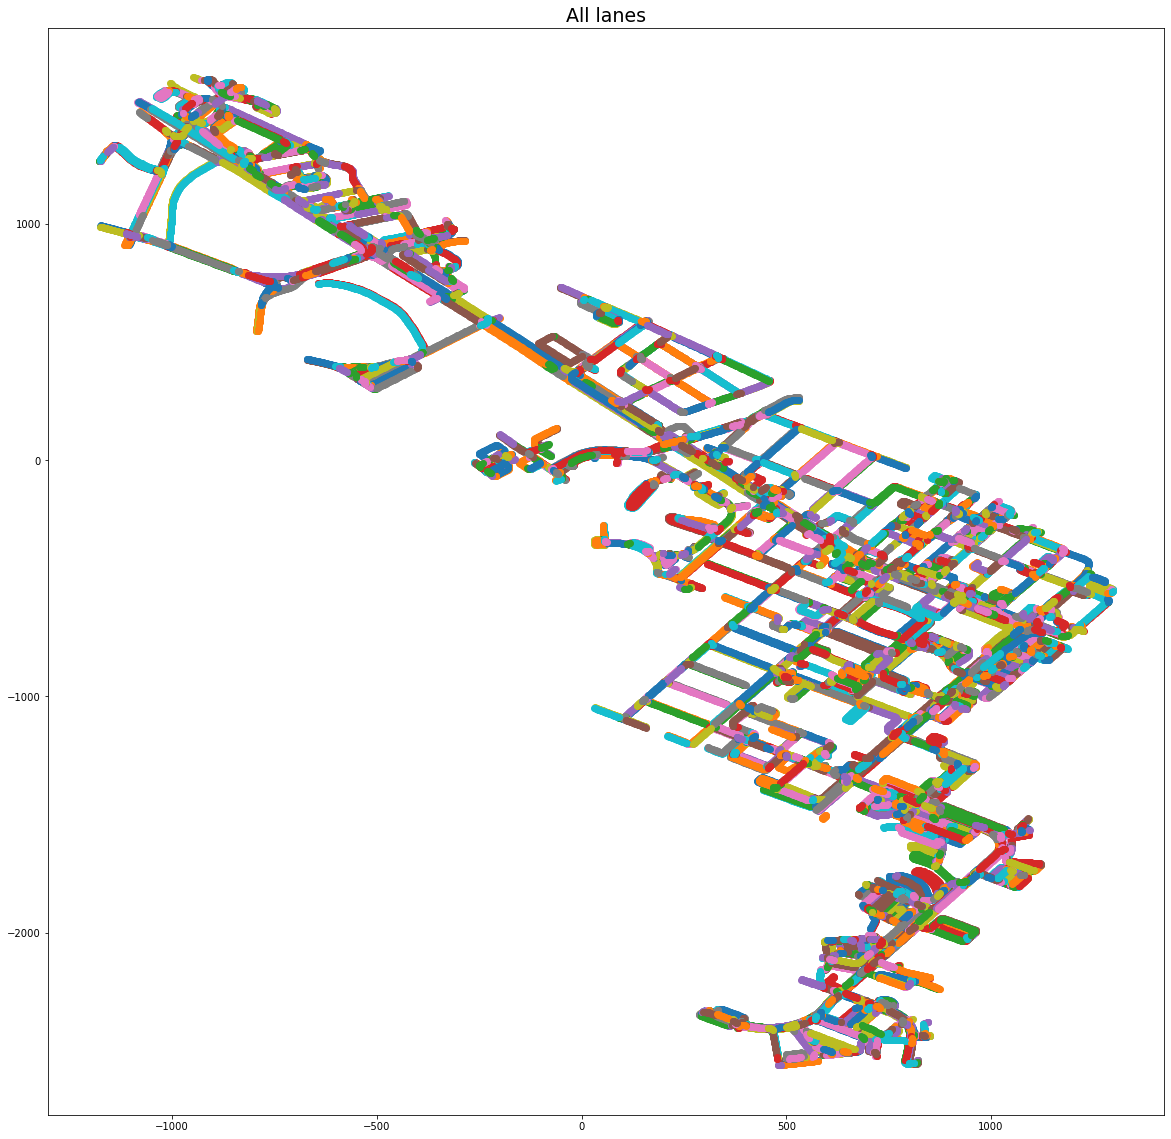

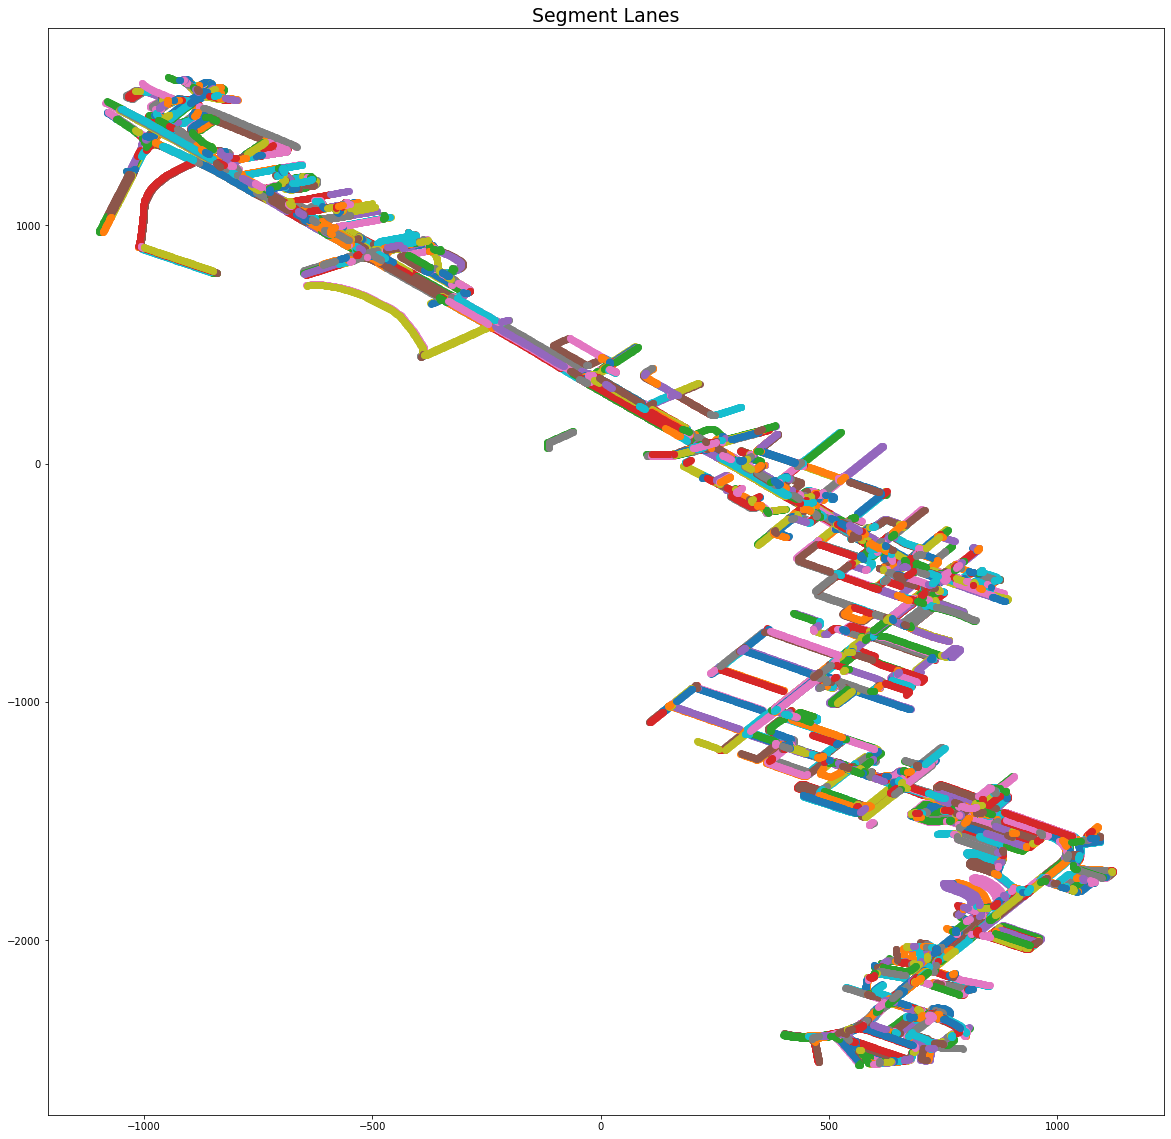

In [14]:
plt.figure(figsize=(20, 20))
for lane_id in lane_id_2_idx:
    lane_center_line = get_lane_center_line(lane_id)
    plt.scatter(lane_center_line[:, 0], lane_center_line[:, 1])
plt.title('All lanes', fontsize=19)

plt.figure(figsize=(20, 20))
for map_segment_lanes in map_segment_2_lanes:
    for lane_id in map_segment_lanes:
        lane_center_line = get_lane_center_line(lane_id)
        plt.scatter(lane_center_line[:, 0], lane_center_line[:, 1])
plt.title('Segment Lanes', fontsize=19)

Text(0.5, 1.0, 'Lanes Outside Segments')

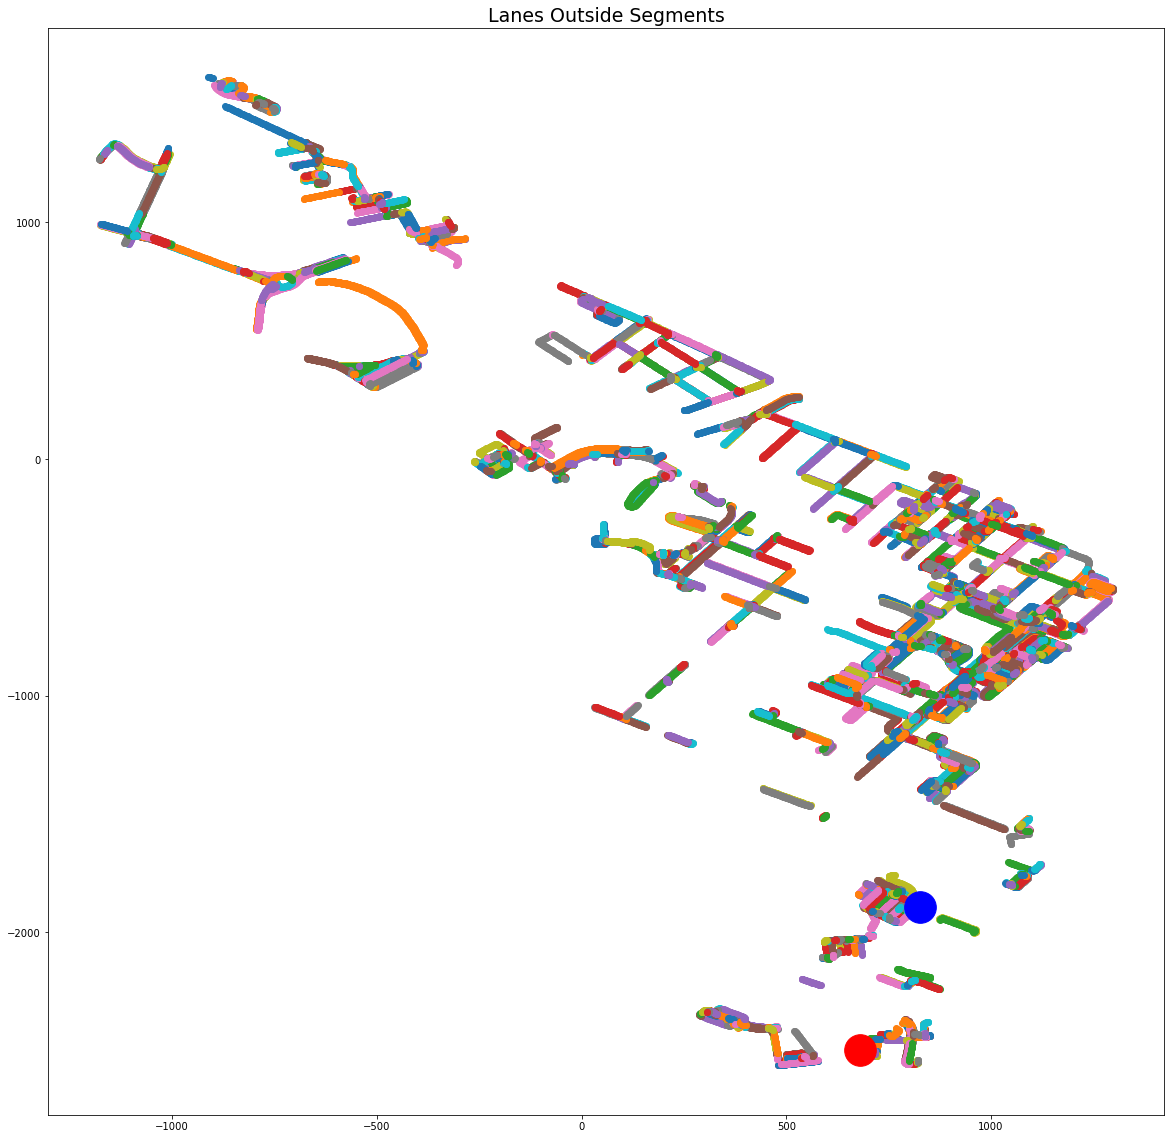

In [17]:
plt.figure(figsize=(20, 20))
for lane_id in lanes_outside_segments:
    lane_center_line = get_lane_center_line(lane_id)
    plt.scatter(lane_center_line[:, 0], lane_center_line[:, 1])
    
plt.scatter([681.0265502944105], [-2497.7429199226062], c='r', s=1000)
plt.scatter([826.5403442397228], [-1894.9787597663037], c='b', s=1000)
plt.title('Lanes Outside Segments', fontsize=19)

In [19]:
map_segment_2_lanes.append(lanes_outside_segments)

with open(os.path.join(SEGMENTS_OUTPUT_PATH, 'map_segment_2_lanes.pkl'), 'wb') as f:
    pickle.dump(map_segment_2_lanes, f)